# Project 4

Attestation: We conducted the project totally within group, and every member made a great contribution to the project.

# Part 1

#### Identify and describe your dataset, its source, and what appeals to you about it:

We used the NYPD Motor Vehicles Collision dataset found here: https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95

The full dataset contains 29 fields and 1.4 million records of car accidents in NYC between 2011 and 2018. For our analysis, we have decided to retain data from the past two years (2017 and 2018), comprising about 430,000 records. Each record represents a collision in NYC by city, borough, precinct and cross street. 

This data can be used by the public to see how dangerous/safe intersections are in NYC, and we believe some interesting regional and temporal trends may emerge from our analysis. We selected this dataset because it provides a sufficient volume of transactional data, has both categorical and numeric variables, and leaves enough to be cleaned while already being relatively tidy.  

####  Initial exploration to determine which themes you wish to explore:

We will have a first look at DATE column, and find out how many collisions occur every single day between 1/1/2017 and 11/16/2018. We can explore trends about what date or date range has high incidence rate.

In the TIME column, we want to figure out what is the time range that has high probability of motor vehicle collisions.

About BOROUGH and ZIP CODE factors, we’d like to have a research about what areas have more collisions and the relationship between geography location and people injured/killed, contributing factors, etc,. This is an important theme in our project.

Based on LATITUDE and LONGITUDE, we can have some visualizations of locations about collisions.

ON STREET NAME and CROSS STREET NAME show the collisions that occur on the street area, OFF STREET NAME shows collisions that occur on anywhere but not the street area. We will explore the pattern of this theme.

NUMBER OF PERSONS INJURED is the sum of NUMBER OF PEDESTRIANS INJURED, NUMBER OF CYCLIST INJURED and NUMBER OF MOTORIST INJURED. NUMBER OF PERSONS KILLED is the sum of NUMBER OF PEDESTRIANS KILLED, NUMBER OF CYCLIST KILLED and NUMBER OF MOTORIST KILLED. We can get statistics about people killed or injured of different kinds ,although this is a cruel theme.

For CONTRIBUTING FACTOR, we will specify the reasons of every collision, and get the result of which contributing factor that happens most. The series of columns also tell us how many vehicles are included in the collision.

For VEHICLE TYPE, we will figure out what kind of cars are involved in the collision. We can find the most common kind of car and make some suggestions to customers.


#### Describe the questions you want to be able to answer with the data:

We split the questions for analysis to 4 parts. 

The first part is date and time, includes month, day and hour. 

The second part related with location, includes borough, zipcode, street names. 

The third part deals with numbers, including number of pedestrians, cyclist and motorist that killed or injured. 

The forth part includes factors and vehicle types.

For each part above, we have two basic questions. What is the number of collision? What is the total numnber of people killed or injured? These two questions will be analyzed by grouping by the columns from those different parts. Take the first part as an example, what is the number of collisions in Jan, in Feb ... and in Dec? What is the number of total people injured or killed in Jan, in Feb ... and in Dec? If necessary, we use vasualization to enhance the analysis, as well as the insights and potential reasons for certain results.

#### Concerns about the data:

After checking the dataset, we found there are many missing value in borough and zip code. We concerned that null values may take bad affection about the following in-depth research about the point of collisions happened.

(Language problem) As for the street names, there are three columns: ON STREET NAME, CROSS STREET NAME, OFF STREET NAME. We are little confused with the meaning of off-street name. We thought it should be the area where are not on the street, such as parking lots, yards. 

We roughly looked through the whole data and found that there are many zero in these columns related with facts: NUMBER OF PEDESTRIANS INJURED, NUMBER OF PEDESTRIANS KILLED, NUMBER OF CYCLIST INJURED, NUMBER OF CYCLIST KILLED, NUMBER OF MOTORIST INJURED and NUMBER OF MOTORIST KILLED. 

We found there are many unspecified contributing factor in columns and there are more than one factors for a car accident in different columns, which may make some troubles on analyzing the factors of traffic collisions.  Moreover, many null values in the columns: CONTRIBUTING FACTOR VEHICLE 3,4,5, although these null values are reasonable, because most of collisions just having 2 vehicles.

In a collision, there may be not only two cars, so it’s easy to understand there are five columns about vehicle type code. However, we concerned about if we want to get similar car accident event, we need to know the vehicle type. It’s not easy to combine two or more type in one car accident, for different number of vehicles participated in different collisions. 


#### Challenges:

Since analysis by borough is an important component of our project, the large number of accidents where boroughs are missing can be a problem. But we decide not to delete them. These may cause a challenge to our analysis, but we can remove the records have null value in borough from our results to overcome it.

We may have problems that keys are not successfully insert into another table from its orginal table. We need to replace the null value in some columns to realize inserting keys into fact table. This is a precess that runs slowly. Be patient.

It's challenging to use suitable kind of visualization to empover our analysis, as well as analyze the potential reasons for some results that beyond our expectation.

In our dataset, most collisions only involve two cars, which leave us with six columns in which most values would be null or unspecified. If we simply delete all those columns, we might miss some important information. But if we don’t, how should we deal with that much null values? If we merge them with other related columns, how should we conduct analyzing? There could also be technical problems when merging those columns together.


# Part 2

#### Recipe for the wrangling part from Trifacta

filter type: missing missing: LATITUDE action: Delete
filter type: missing missing: LONGITUDE action: Delete
drop col: LOCATION action: Drop
drop col: {CONTRIBUTING FACTOR VEHICLE 2} action: Drop
drop col: {CONTRIBUTING FACTOR VEHICLE 3} action: Drop
drop col: {CONTRIBUTING FACTOR VEHICLE 4} action: Drop
drop col: {CONTRIBUTING FACTOR VEHICLE 5} action: Drop
merge col: {VEHICLE TYPE CODE 1},{VEHICLE TYPE CODE 2},{VEHICLE TYPE CODE 3},{VEHICLE TYPE CODE 4},{VEHICLE TYPE CODE 5} with: ' ' as: 'column1'
rename type: manual mapping: [column1,'ALL VEHICLE']
merge col: DATE,TIME with: ' ' as: 'column1'
dateformat col: column1 type: longslashdatetime
rename type: manual mapping: [column1,'DATETIME']


#### Decisions for modify or remove data:

1.We drop the columns CONTRIBUTING FACTOR VEHICLE 2,3,4,5 because we regard factor1 as the main factor, and most of values in factor 2,3,4,5 are unspecified or null, so we decide to drop these.

2.We combine the VEHICLE TYPE CODE1,2,3,4,5 into one column, so that we can analyze the combination of vehicle data that has most frequency of collision.

3.We drop LOCATION column, because it includes information of latitude and longitude, that have already in the dataset.

4.We were originally planning to delete all rows that contain null values in borough and zip code columns. However, we ultimately decided to retain them because we would be scrapping too much valuable data, and we decided having nulls in those fields was not a big issue.

5.We merge the date and time column into one, so that we can easily format it for sql queries.

6.We delete the rows that don't have x/y coordinates, because it is important factor and we even can't show them in map.


#### How you overcame any challenges:

1.When merging 5 columns together, we used ‘,’ as the separator at first, but this caused confliction when inserting data into sql data table. Thus, we rewrangled the dataset by substituting the separator with ‘/’.

2.We take some reasonable assumptions to deal with too many unspecified values in factors.

3.x/y coordinates are all little different and hard to group by, so we make them in a map to show it.

4.Other chagllenges can be overcame by wrangling data and assumption part.

#### Assumptions  about the meaning of variables and their values

We assume that the column CONTRIBUTING FACTOR VEHICLE 1 as the main factors of causing collisions, so we renamed this column as CONTRIBUTING FACTOR and deleted other four factor columns. 

We assume new column ALL VEHICLE collected all vehicle type codes happened in one collision.  

We assume the first column in vehicle type is the vehicle that takes main responsibility for its collision.

ON STREET NAME, CROSS STREET NAME, OFF STREET NAME. We are little confused with the meaning of off-street name. We thought it should be the area where are not on the street, such as parking lots, yards. 


#### Verify that your wrangling steps have succeeded:

The verification part is conducted for several times below.

### Star schema

In [1]:
from IPython.display import Image 
Image(url="https://raw.githubusercontent.com/yzhao84/123/2e66146aba249bcdb8f562607258f9415e3cf011/schema.jpg")

#### Summary: We have 4 tables in our model. The collision table is fact table, alltime, participants and location table are dimension tables. Those 8 fact columns in collision table have totally same characteristics and timing, so we combine them into the same fact table, which can be analyzed successfully.

In [2]:
%load_ext sql

In [3]:
!dropdb -U student project4

In [4]:
!createdb -U student project4

In [5]:
%sql postgresql://student@/project4

'Connected: student@project4'

In [6]:
!wc -l collision.csv

400359 collision.csv


#### Set up Spark to verify the file

In [7]:
import findspark
from pyspark import SparkContext
spark = SparkContext(appName='project4')

In [8]:
from pyspark import SQLContext
sqlc = SQLContext(spark)
colli = sqlc.read.csv("collision.csv")

In [9]:
colli.rdd.count()

400359

#### 400359 rows(including headers row) verifies that the file has been loaded right.

#### Headers for the dataset

In [7]:
!csvcut -n collision.csv

  1: DATE
  2: TIME
  3: DATETIME
  4: BOROUGH
  5: ZIP CODE
  6: LATITUDE
  7: LONGITUDE
  8: ON STREET NAME
  9: CROSS STREET NAME
 10: OFF STREET NAME
 11: NUMBER OF PERSONS INJURED
 12: NUMBER OF PERSONS KILLED
 13: NUMBER OF PEDESTRIANS INJURED
 14: NUMBER OF PEDESTRIANS KILLED
 15: NUMBER OF CYCLIST INJURED
 16: NUMBER OF CYCLIST KILLED
 17: NUMBER OF MOTORIST INJURED
 18: NUMBER OF MOTORIST KILLED
 19: CONTRIBUTING FACTOR VEHICLE 1
 20: UNIQUE KEY
 21: VEHICLE TYPE CODE 1
 22: VEHICLE TYPE CODE 2
 23: VEHICLE TYPE CODE 3
 24: VEHICLE TYPE CODE 4
 25: VEHICLE TYPE CODE 5
 26: ALL VEHICLE


In [ ]:
!head -n 10000 collision.csv | csvstat

#### Create collision table(includes facts)

In [10]:
%%sql
DROP TABLE IF EXISTS collision;

CREATE TABLE collision (
    Date DATE,
    Time TIME,
    Datetime TIMESTAMP,
    Borough VARCHAR(100),
    Zipcode VARCHAR(100),
    Latitude VARCHAR(100),
    Longitude VARCHAR(100),
    On_Street_Name VARCHAR(500),
    Cross_Street_Name VARCHAR(500),
    Off_Street_Name VARCHAR(500),
    Persons_Injured INTEGER NOT NULL,
    Persons_Killed INTEGER NOT NULL,
    Pedestrian_Injured INTEGER NOT NULL,
    Pedestrian_Killed INTEGER NOT NULL,
    Cyclist_Injured INTEGER NOT NULL,
    Cyclist_Killed INTEGER NOT NULL,
    Motorist_Injured INTEGER NOT NULL,
    Motorist_Killed INTEGER NOT NULL,
    Contributing_Factor VARCHAR(500),
    unique_key INTEGER NOT NULL,
    Vehicle_Type_Code_1 VARCHAR(500),
    Vehicle_Type_Code_2 VARCHAR(500),
    Vehicle_Type_Code_3 VARCHAR(500),
    Vehicle_Type_Code_4 VARCHAR(500),
    Vehicle_Type_Code_5 VARCHAR(500),
    All_Vehicles VARCHAR(500)
)

 * postgresql://student@/project4
Done.
Done.


[]

In [11]:
!pwd

/home/ubuntu/Project4


In [11]:
%%sql
COPY collision FROM '/home/ubuntu/Project4/collision.csv'
CSV
HEADER;

 * postgresql://student@/project4
400358 rows affected.


[]

#### The number of rows affected is right.

In [13]:
%%sql
SELECT * FROM collision
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


date,time,datetime,borough,zipcode,latitude,longitude,on_street_name,cross_street_name,off_street_name,persons_injured,persons_killed,pedestrian_injured,pedestrian_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor,unique_key,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,all_vehicles
2018-11-16,00:10:00,2018-11-16 00:10:00,MANHATTAN,10010,40.742275,-73.988914,5 AVENUE,BROADWAY,None,0,0,0,0,0,0,0,0,Unspecified,4021880,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,None,None,None,Station Wagon/Sport Utility Vehicle Station Wagon/Sport Utility Vehicle
2018-11-16,00:40:00,2018-11-16 00:40:00,None,None,40.76272,-73.72817,LONG ISLAND EXPRESSWAY,None,None,0,0,0,0,0,0,0,0,Pavement Slippery,4021727,Sedan,Pick-up Truck,None,None,None,Sedan Pick-up Truck
2018-11-16,00:45:00,2018-11-16 00:45:00,BROOKLYN,11211,40.710197,-73.95843,BORINQUEN PLACE,HAVEMEYER STREET,None,4,0,0,0,0,0,4,0,Driver Inattention/Distraction,4021791,Taxi,Taxi,None,None,None,Taxi Taxi
2018-11-16,01:00:00,2018-11-16 01:00:00,BRONX,10454,40.803555,-73.91184,EAST 137 STREET,WILLOW AVENUE,None,0,0,0,0,0,0,0,0,Pavement Slippery,4021878,Garbage or Refuse,Station Wagon/Sport Utility Vehicle,None,None,None,Garbage or Refuse Station Wagon/Sport Utility Vehicle
2018-11-16,01:00:00,2018-11-16 01:00:00,BROOKLYN,11221,40.694923,-73.915565,WILSON AVENUE,PALMETTO STREET,None,0,0,0,0,0,0,0,0,Pavement Slippery,4021848,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,None,None,None,Station Wagon/Sport Utility Vehicle Station Wagon/Sport Utility Vehicle
2018-11-16,01:20:00,2018-11-16 01:20:00,None,None,40.8047,-73.91243,EAST 138 STREET,BRUCKNER BOULEVARD,None,1,0,1,0,0,0,0,0,None,4021877,None,None,None,None,None,
2018-11-16,01:41:00,2018-11-16 01:41:00,None,None,40.737682,-73.85206,108 STREET,HORACE HARDING EXPRESSWAY,None,0,0,0,0,0,0,0,0,Following Too Closely,4021798,Sedan,Sedan,None,None,None,Sedan Sedan
2018-11-16,02:50:00,2018-11-16 02:50:00,BRONX,10451,40.819057,-73.92923,EAST 149 STREET,GERARD AVENUE,None,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4021864,Taxi,Taxi,None,None,None,Taxi Taxi
2018-11-16,04:22:00,2018-11-16 04:22:00,None,None,40.81175,-73.93144,MAJOR DEEGAN EXPRESSWAY,None,None,0,0,0,0,0,0,0,0,Unsafe Speed,4021857,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,None,None,None,Station Wagon/Sport Utility Vehicle Station Wagon/Sport Utility Vehicle
2018-11-16,05:30:00,2018-11-16 05:30:00,QUEENS,11417,40.67887,-73.83419,ROCKAWAY BOULEVARD,CENTREVILLE AVENUE,None,1,0,1,0,0,0,0,0,Driver Inattention/Distraction,4021833,None,None,None,None,None,


#### Divide date and time into month, day, hour

In [12]:
%%sql
SELECT DISTINCT TO_CHAR(datetime, 'MM/DD/YYYY HH24:00:00') AS date_time,
    TO_CHAR(datetime, 'YYYY') AS year, 
    TO_CHAR(datetime, 'MM') AS month,
    TO_CHAR(datetime, 'Month') AS month_year,
    TO_CHAR(datetime, 'DD') AS day,
    TO_CHAR(datetime, 'Day') AS day_week,
    TO_CHAR(datetime, 'HH24:00:00') AS allhour,
    TO_CHAR(datetime, 'HH24') AS hour
From collision
limit 10

 * postgresql://student@/project4
10 rows affected.


date_time,year,month,month_year,day,day_week,allhour,hour
08/05/2018 17:00:00,2018,08,August,05,Sunday,17:00:00,17
04/13/2018 10:00:00,2018,04,April,13,Friday,10:00:00,10
03/08/2018 11:00:00,2018,03,March,08,Thursday,11:00:00,11
08/04/2018 08:00:00,2018,08,August,04,Saturday,08:00:00,08
09/01/2018 21:00:00,2018,09,September,01,Saturday,21:00:00,21
01/18/2018 03:00:00,2018,01,January,18,Thursday,03:00:00,03
09/25/2018 12:00:00,2018,09,September,25,Tuesday,12:00:00,12
04/10/2018 03:00:00,2018,04,April,10,Tuesday,03:00:00,03
02/02/2017 06:00:00,2017,02,February,02,Thursday,06:00:00,06
07/25/2017 16:00:00,2017,07,July,25,Tuesday,16:00:00,16


#### Create dimension table alltime

In [13]:
%%sql
DROP TABLE IF EXISTS alltime;

CREATE TABLE alltime (
    alltime_key SERIAL PRIMARY KEY,
    date_time VARCHAR(50),
    year VARCHAR(15),
    month VARCHAR(15),
    month_year VARCHAR(15),
    day VARCHAR(15),
    day_week VARCHAR(15),
    allhour VARCHAR(15),
    hour VARCHAR(15)
);

 * postgresql://student@/project4
Done.
Done.


[]

In [14]:
%%sql
INSERT INTO alltime (date_time,year,month,month_year,day,day_week,allhour,hour)
SELECT DISTINCT 
    TO_CHAR(datetime, 'MM/DD/YYYY HH24:00:00') AS date_time,
    TO_CHAR(datetime, 'YYYY') AS year, 
    TO_CHAR(datetime, 'MM') AS month,
    TO_CHAR(datetime, 'Month') AS month_year,
    TO_CHAR(datetime, 'DD') AS day,
    TO_CHAR(datetime, 'Day') AS day_week,
    TO_CHAR(datetime, 'HH24:00:00') AS allhour,
    TO_CHAR(datetime, 'HH24') AS hour
From collision;


 * postgresql://student@/project4
16370 rows affected.


[]

In [15]:
%%sql
SELECT * FROM alltime
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


alltime_key,date_time,year,month,month_year,day,day_week,allhour,hour
1,08/05/2018 17:00:00,2018,08,August,05,Sunday,17:00:00,17
2,04/13/2018 10:00:00,2018,04,April,13,Friday,10:00:00,10
3,03/08/2018 11:00:00,2018,03,March,08,Thursday,11:00:00,11
4,08/04/2018 08:00:00,2018,08,August,04,Saturday,08:00:00,08
5,09/01/2018 21:00:00,2018,09,September,01,Saturday,21:00:00,21
6,01/18/2018 03:00:00,2018,01,January,18,Thursday,03:00:00,03
7,09/25/2018 12:00:00,2018,09,September,25,Tuesday,12:00:00,12
8,04/10/2018 03:00:00,2018,04,April,10,Tuesday,03:00:00,03
9,02/02/2017 06:00:00,2017,02,February,02,Thursday,06:00:00,06
10,07/25/2017 16:00:00,2017,07,July,25,Tuesday,16:00:00,16


In [16]:
%%sql
ALTER TABLE collision
ADD COLUMN alltime_key INTEGER,
ADD CONSTRAINT fk_alltime_key
    FOREIGN KEY (alltime_key)
    REFERENCES alltime (alltime_key);

 * postgresql://student@/project4
Done.


[]

In [17]:
%%sql
SELECT alltime_key FROM collision
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


alltime_key
None
None
None
None
None
None
None
None
None
None


#### The key is not inserted into collision table, we need to fix it.

In [18]:
%%sql
DROP INDEX IF EXISTS idx_alltime;

CREATE INDEX idx_alltime ON alltime (date_time,year,month,month_year,day,day_week,allhour,hour);

 * postgresql://student@/project4
Done.
Done.


[]

In [19]:
%%sql
UPDATE collision
SET alltime_key = alltime.alltime_key
FROM alltime
WHERE TO_CHAR(collision.datetime, 'MM/DD/YYYY HH24:00:00') = alltime.date_time;

 * postgresql://student@/project4
400358 rows affected.


[]

In [20]:
%%sql
SELECT alltime_key FROM collision
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


alltime_key
742
7429
11483
3939
12685
10466
12480
9261
14719
14440


#### Create dimension table-- location

In [21]:
%%sql
DROP TABLE IF EXISTS location;

CREATE TABLE location (
    location_key SERIAL PRIMARY KEY,
    Borough VARCHAR(100),
    Zipcode VARCHAR(100),
    Latitude VARCHAR(100),
    Longitude VARCHAR(100),
    On_Street_Name VARCHAR(500),
    Cross_Street_Name VARCHAR(500),
    Off_Street_Name VARCHAR(500)
);

 * postgresql://student@/project4
Done.
Done.


[]

In [22]:
%%sql
INSERT INTO location (Borough, Zipcode, Latitude, Longitude, On_Street_Name, Cross_Street_Name, Off_Street_Name)
SELECT DISTINCT Borough, Zipcode, Latitude, Longitude, On_Street_Name, Cross_Street_Name, Off_Street_Name
FROM collision;

 * postgresql://student@/project4
161113 rows affected.


[]

In [23]:
%%sql
ALTER TABLE collision
ADD COLUMN location_key INTEGER,
ADD CONSTRAINT fk_location_key
    FOREIGN KEY (location_key)
    REFERENCES location (location_key);

 * postgresql://student@/project4
Done.


[]

In [24]:
%%sql
SELECT * FROM location
WHERE latitude not in ('0') and longitude not in ('0')
limit 10

 * postgresql://student@/project4
10 rows affected.


location_key,borough,zipcode,latitude,longitude,on_street_name,cross_street_name,off_street_name
3,BRONX,10451,40.65878,-73.960526,EAST 138 STREET,EXTERIOR STREET,None
4,BRONX,10451,40.715153,-73.77345,None,None,370 MORRIS AVENUE
5,BRONX,10451,40.808056,-73.93141,None,None,2417 3 AVENUE
6,BRONX,10451,40.80901,-73.929955,None,None,2443 3 AVENUE
7,BRONX,10451,40.809174,-73.93054,None,None,224 EAST 134 STREET
8,BRONX,10451,40.809242,-73.93063,None,None,220 EAST 134 STREET
9,BRONX,10451,40.80976,-73.929,None,None,2477 3 AVENUE
10,BRONX,10451,40.8099,-73.92881,3 AVENUE,EAST 136 STREET,None
11,BRONX,10451,40.8099,-73.92881,EAST 136 STREET,3 AVENUE,None
12,BRONX,10451,40.810196,-73.93068,None,None,200 EAST 135 STREET


#### on_street_name and cross_street_name are pair data which appear at the same time. off_street_name is the opposite to that pair, so they don't appear at the same time.

#### Build the index

In [25]:
%%sql
DROP INDEX IF EXISTS idx_location;

CREATE INDEX idx_location ON location (Borough, Zipcode, Latitude, Longitude, On_Street_Name, Cross_Street_Name, Off_Street_Name);

 * postgresql://student@/project4
Done.
Done.


[]

In [26]:
%%sql
UPDATE collision
SET on_street_name = 'MISS'
WHERE on_street_name is NULL;

UPDATE collision
SET cross_street_name = 'MISS'
WHERE cross_street_name is NULL;

UPDATE collision
SET off_street_name = 'MISS'
WHERE off_street_name is NULL;

UPDATE collision
SET borough = 'MISS'
WHERE borough is NULL;

UPDATE collision
SET zipcode = '0'
WHERE zipcode is NULL;

 * postgresql://student@/project4
123152 rows affected.
210069 rows affected.
303018 rows affected.
138013 rows affected.
138082 rows affected.


[]

In [27]:
%%sql
UPDATE location
SET on_street_name = 'MISS'
WHERE on_street_name is NULL;

UPDATE location
SET cross_street_name = 'MISS'
WHERE cross_street_name is NULL;

UPDATE location
SET off_street_name = 'MISS'
WHERE off_street_name is NULL;

UPDATE location
SET borough = 'MISS'
WHERE borough is NULL;

UPDATE location
SET zipcode = '0'
WHERE zipcode is NULL;

 * postgresql://student@/project4
74752 rows affected.
108221 rows affected.
90483 rows affected.
44818 rows affected.
44835 rows affected.


[]

#### Replace the null values in certain columns in location and collision table, to insert key into collision.

In [28]:
%%sql
UPDATE collision
SET location_key = location.location_key
FROM location
WHERE collision.Borough = location.borough
    AND collision.Zipcode = location.zipcode
    AND collision.Latitude = location.latitude
    AND collision.Longitude = location.longitude
    AND collision.On_Street_Name = location.on_street_name
    AND collision.Cross_Street_Name = location.cross_street_name
    AND collision.Off_Street_Name = location.off_street_name

 * postgresql://student@/project4
400358 rows affected.


[]

In [29]:
%%sql
SELECT location_key FROM collision
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


location_key
148782
116764
132452
136954
157522
116641
156428
132025
147370
121165


#### Create dimension table-- participants 

In [30]:
%%sql
DROP TABLE IF EXISTS participants;

CREATE TABLE participants (
    participants_key SERIAL PRIMARY KEY,
    Contributing_Factor VARCHAR(500),
    Vehicle_Type_Code_1 VARCHAR(500),
    Vehicle_Type_Code_2 VARCHAR(500),
    Vehicle_Type_Code_3 VARCHAR(500),
    Vehicle_Type_Code_4 VARCHAR(500),
    Vehicle_Type_Code_5 VARCHAR(500),
    All_Vehicles VARCHAR(500)
);

 * postgresql://student@/project4
Done.
Done.


[]

In [31]:
%%sql
INSERT INTO participants (Contributing_Factor, Vehicle_Type_Code_1, Vehicle_Type_Code_2, Vehicle_Type_Code_3,
                      Vehicle_Type_Code_4, Vehicle_Type_Code_5, All_Vehicles)
SELECT DISTINCT Contributing_Factor, Vehicle_Type_Code_1, Vehicle_Type_Code_2, Vehicle_Type_Code_3,
                      Vehicle_Type_Code_4, Vehicle_Type_Code_5, All_Vehicles
FROM collision;

 * postgresql://student@/project4
15475 rows affected.


[]

In [32]:
%%sql
ALTER TABLE collision
ADD COLUMN participants_key INTEGER,
ADD CONSTRAINT fk_participants_key
    FOREIGN KEY (participants_key)
    REFERENCES participants (participants_key);

 * postgresql://student@/project4
Done.


[]

#### Build the index

In [33]:
%%sql
DROP INDEX IF EXISTS idx_participants;

CREATE INDEX idx_participants ON participants (Contributing_Factor, Vehicle_Type_Code_1, Vehicle_Type_Code_2, Vehicle_Type_Code_3,
                      Vehicle_Type_Code_4, Vehicle_Type_Code_5, All_Vehicles);

 * postgresql://student@/project4
Done.
Done.


[]

In [34]:
%%sql
SELECT * FROM participants
limit 5

 * postgresql://student@/project4
5 rows affected.


participants_key,contributing_factor,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,all_vehicles
1,Accelerator Defective,BU,TK,None,None,None,BU TK
2,Accelerator Defective,Bus,Dump,None,None,None,Bus Dump
3,Accelerator Defective,Convertible,Sedan,None,None,None,Convertible Sedan
4,Accelerator Defective,Convertible,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,None,None,Convertible Station Wagon/Sport Utility Vehicle Station Wagon/Sport Utility Vehicle
5,Accelerator Defective,DP,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,None,DP PASSENGER VEHICLE PASSENGER VEHICLE PASSENGER VEHICLE


In [35]:
%%sql
UPDATE collision
SET contributing_factor = 'MISS'
WHERE contributing_factor is NULL;

UPDATE collision
SET vehicle_type_code_1 = 'MISS'
WHERE vehicle_type_code_1 is NULL;

UPDATE collision
SET vehicle_type_code_2 = 'MISS'
WHERE vehicle_type_code_2 is NULL;

UPDATE collision
SET vehicle_type_code_3 = 'MISS'
WHERE vehicle_type_code_3 is NULL;

UPDATE collision
SET vehicle_type_code_4 = 'MISS'
WHERE vehicle_type_code_4 is NULL;

UPDATE collision
SET vehicle_type_code_5 = 'MISS'
WHERE vehicle_type_code_5 is NULL;

UPDATE collision
SET all_vehicles = 'MISS'
WHERE all_vehicles is NULL;

 * postgresql://student@/project4
3452 rows affected.
6711 rows affected.
101514 rows affected.
372379 rows affected.
390469 rows affected.
398308 rows affected.
0 rows affected.


[]

In [36]:
%%sql
UPDATE participants
SET contributing_factor = 'MISS'
WHERE contributing_factor is NULL;

UPDATE participants
SET vehicle_type_code_1 = 'MISS'
WHERE vehicle_type_code_1 is NULL;

UPDATE participants
SET vehicle_type_code_2 = 'MISS'
WHERE vehicle_type_code_2 is NULL;

UPDATE participants
SET vehicle_type_code_3 = 'MISS'
WHERE vehicle_type_code_3 is NULL;

UPDATE participants
SET vehicle_type_code_4 = 'MISS'
WHERE vehicle_type_code_4 is NULL;

UPDATE participants
SET vehicle_type_code_5 = 'MISS'
WHERE vehicle_type_code_5 is NULL;

UPDATE participants
SET all_vehicles = 'MISS'
WHERE all_vehicles is NULL;

 * postgresql://student@/project4
123 rows affected.
51 rows affected.
1151 rows affected.
9916 rows affected.
12800 rows affected.
14423 rows affected.
0 rows affected.


[]

#### Replace null values in certain columns in collision and participants table, to insert key into collision table.

In [37]:
%%sql
UPDATE collision
SET participants_key = participants.participants_key
FROM participants
WHERE collision.Contributing_Factor = participants.Contributing_Factor
    AND collision.Vehicle_Type_Code_1 = participants.Vehicle_Type_Code_1
    AND collision.Vehicle_Type_Code_2 = participants.Vehicle_Type_Code_2
    AND collision.Vehicle_Type_Code_3 = participants.Vehicle_Type_Code_3
    AND collision.Vehicle_Type_Code_4 = participants.Vehicle_Type_Code_4
    AND collision.Vehicle_Type_Code_5 = participants.Vehicle_Type_Code_5
    AND collision.All_Vehicles = participants.All_Vehicles

 * postgresql://student@/project4
400358 rows affected.


[]

In [38]:
%%sql
SELECT participants_key from collision
limit 10

 * postgresql://student@/project4
10 rows affected.


participants_key
6042
15475
13479
14344
11435
5541
14344
14344
14344
9973


#### Drop all columns in collision table, except fact columns and keys.

In [39]:
%%sql
ALTER TABLE collision
DROP COLUMN Date,
DROP COLUMN Time,
DROP COLUMN Datetime,
DROP COLUMN Borough,
DROP COLUMN Zipcode,
DROP COLUMN Latitude,
DROP COLUMN Longitude,
DROP COLUMN On_Street_Name,
DROP COLUMN Cross_Street_Name,
DROP COLUMN Off_Street_Name,
DROP COLUMN Contributing_Factor,
DROP COLUMN Vehicle_Type_Code_1,
DROP COLUMN Vehicle_Type_Code_2,
DROP COLUMN Vehicle_Type_Code_3,
DROP COLUMN Vehicle_Type_Code_4,
DROP COLUMN Vehicle_Type_Code_5,
DROP COLUMN unique_key,
DROP COLUMN All_Vehicles

 * postgresql://student@/project4
Done.


[]

In [40]:
%%sql
SELECT * FROM collision
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


persons_injured,persons_killed,pedestrian_injured,pedestrian_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,alltime_key,location_key,participants_key
0,0,0,0,0,0,0,0,12059,157821,14344
0,0,0,0,0,0,0,0,5966,158546,14344
1,0,0,0,0,0,1,0,7276,129585,9973
1,0,1,0,0,0,0,0,15900,87546,14344
0,0,0,0,0,0,0,0,13085,153633,8626
0,0,0,0,0,0,0,0,16358,92492,14344
1,0,1,0,0,0,0,0,13914,147582,5153
0,0,0,0,0,0,0,0,14954,144113,14701
1,0,1,0,0,0,0,0,523,147048,14344
0,0,0,0,0,0,0,0,3814,142212,6042


In [41]:
%%sql
SELECT count(*) FROM collision

 * postgresql://student@/project4
1 rows affected.


count
400358


#### Verify: the number of rows in fact table is correct.





# Part 3 Analysis

### Part 3 Analysis Part A: date and time.

#### Number of collisions happen in different days in a week

In [53]:
%%sql
SELECT day_week, COUNT(*) count
FROM collision
JOIN alltime
  ON collision.alltime_key = alltime.alltime_key
GROUP BY day_week
ORDER BY count;

 * postgresql://student@/project4
7 rows affected.


day_week,count
Sunday,46801
Saturday,52852
Monday,57302
Wednesday,58847
Tuesday,59209
Thursday,61440
Friday,63907


In [54]:
%matplotlib inline

<BarContainer object of 7 artists>

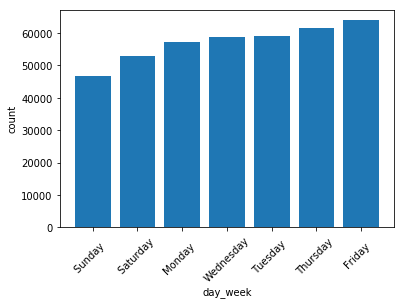

In [55]:
_.bar()

#### From the bar graph and count numbers, we can see number of collisions happen on weekdays is higher than happen on weekends. This result is in our estimate. On weekdays, people are busy with work, school and other routines, so, the percentage of journeys by motor vehicles on weekdays have increased. As usual, people prefer to stay at home to enjoy their family time on weekends, accordingly, the percentage of journeys by motor vehicles on weekends is smaller than on weekdays. In this way, the collisions happend more on weekdays.

#### Number of collisions happen in every hour

In [56]:
%%sql
SELECT hour, COUNT(*) count
FROM collision
JOIN alltime
  ON collision.alltime_key = alltime.alltime_key
GROUP BY hour
ORDER BY hour;

 * postgresql://student@/project4
24 rows affected.


hour,count
00,14247
01,6105
02,4514
03,4012
04,4692
05,5335
06,8760
07,12878
08,22358
09,21676


<BarContainer object of 24 artists>

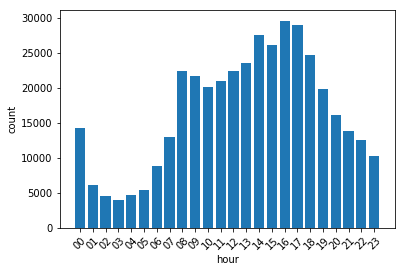

In [57]:
_.bar()

#### From the bar chart, we can see more collisions happen in rush hours or we can define the rush hour of New York City from this graph. There is a very much traffic from 7am to 7pm. We found at midnight, there are also much crashes happen. The reason why is this situation is after dinner party acitivies, people always have alcohol which may cause the drinking driving. Moreover, driviers are easy tired at midnight after a long-time driving. 

#### Number of collisions happen in each month

In [58]:
%%sql
SELECT month_year, COUNT(*) count
FROM collision
JOIN alltime
  ON collision.alltime_key = alltime.alltime_key
GROUP BY month_year
ORDER BY count(*) DESC;

 * postgresql://student@/project4
12 rows affected.


month_year,count
June,39521
May,39136
October,37506
July,36766
March,36170
August,35997
September,35885
April,33609
January,30974
February,29683


<BarContainer object of 12 artists>

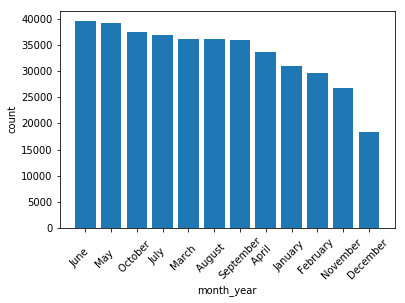

In [59]:
_.bar()

#### Before we analyze this dataset, we thought there might be little difference on number of collisions happen between different months. Based on what I found in count number, we are surprised about the result because there are less collisions happen in winter, such as December, November, February and January. In our previous thoughts, because of slippery or iced ground, there should be more crashes. So, we thought about this situation and get our own conclusion about it: because there are many holidays in winter and cold weather, people prefer to stay at home to enjoy their hoildays. And even if they need to drive, they will pay attention to drive on slippery groud. 

#### Number of people injured in collisions in each day of a week 

In [60]:
%%sql
SELECT day_week, SUM(persons_injured)
FROM collision
JOIN alltime
  ON collision.alltime_key = alltime.alltime_key
GROUP BY day_week
ORDER BY SUM(persons_injured) DESC;

 * postgresql://student@/project4
7 rows affected.


day_week,sum
Friday,16257
Thursday,15695
Tuesday,15145
Saturday,15018
Wednesday,14944
Monday,14745
Sunday,14205


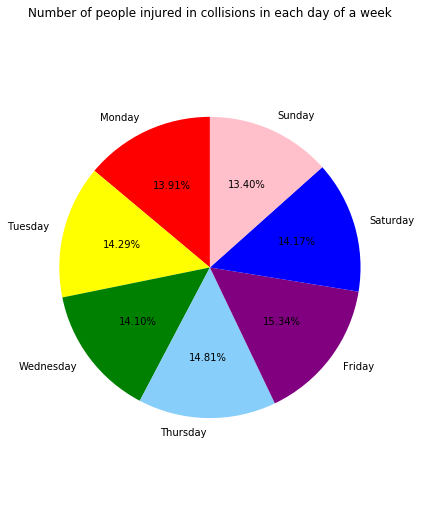

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,9))
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] 
sizes = [14745,15145,14944,15695,16257,15018,14205] 
colors = ['red','yellow','green','lightskyblue','purple','blue','pink'] 
patches,text1,text2 = plt.pie(sizes,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%',
                      shadow = False,
                      startangle =90, 
                      pctdistance = 0.6) 
plt.axis('equal')
plt.title("Number of people injured in collisions in each day of a week")
plt.show()

#### The number of people injured in a car accident every day during the week is relatively average. Only the number of people injured on Fridays is much higher. We suspect that the reason may be that Friday is the day before weekend, people have a large amount of travel, there are many vehicles, and it is prone to accidents, causing people to be injured.

#### Number of people injured in collisions in each hour of a day

In [62]:
%%sql
SELECT hour, SUM(persons_injured)
FROM collision
JOIN alltime
  ON collision.alltime_key = alltime.alltime_key
GROUP BY hour
ORDER BY hour;

 * postgresql://student@/project4
24 rows affected.


hour,sum
00,4282
01,1939
02,1438
03,1453
04,1758
05,1662
06,2480
07,3395
08,5348
09,4769


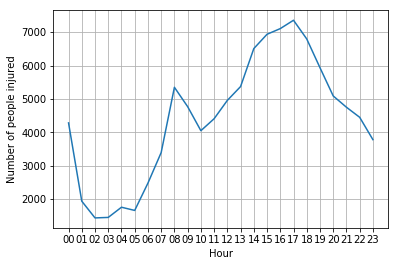

In [63]:
import matplotlib.pyplot as plt
import numpy as np
plt.xlabel('Hour')
plt.ylabel('Number of people injured') 
x = ["00","01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22","23"]
y = [4282,1939,1438,1453,1758,1662,2480,3395,5348,4769,4049,4407,4956,5370,6507,6935,7105,7355,6795,5935,5089,4751,4450,3781]
plt.plot(x,y)
plt.grid()

#### From this line chart, we can see at 8am and 5pm and midnight are three peak values. There are more people injured in collisions at morning rush hour and evening rush hour, which is positively related to the number of accidents occurring per hour. Moreover, as for midnight, because of dark night, sometimes people can't realize some motor vehicles when they walk on the streets.

#### Number of people killed in collisions in each hour of a day

In [64]:
%%sql
SELECT hour, SUM(persons_killed)
FROM collision
JOIN alltime
  ON collision.alltime_key = alltime.alltime_key
GROUP BY hour
ORDER BY hour;

 * postgresql://student@/project4
24 rows affected.


hour,sum
00,20
01,12
02,15
03,20
04,24
05,15
06,18
07,13
08,7
09,9


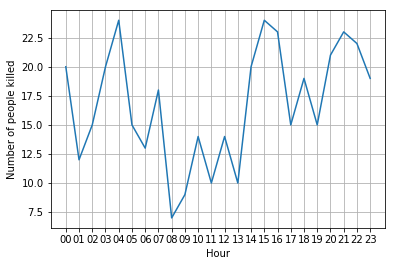

In [65]:
import matplotlib.pyplot as plt
plt.xlabel('Hour')
plt.ylabel('Number of people killed') 
x = ["00","01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22","23"]
y = [20,12,15,20,24,15,13,18,7,9,14,10,14,10,20,24,23,15,19,15,21,23,22,19]
plt.plot(x,y)
plt.grid()

#### Comparing with the line chart of number of people injured in collision, this graph is totally different. In our estimate, the peak values should also at the rush hour because of large traffic. However, in this line chart, the peak values are out of morning and evening rush hour. We thought because people who need to go to work drive carefully in rush hour and they don't want collisions to hander them. So the number of people killed in collision happen at 8am and 5 to 7 pm are lower than other.

#### Number of people killed in collisions in each day of a week

In [66]:
%%sql
SELECT day_week, SUM(persons_killed)
FROM collision
JOIN alltime
  ON collision.alltime_key = alltime.alltime_key
GROUP BY day_week
ORDER BY SUM(persons_killed) DESC;

 * postgresql://student@/project4
7 rows affected.


day_week,sum
Saturday,68
Sunday,68
Monday,61
Tuesday,57
Thursday,54
Friday,53
Wednesday,41


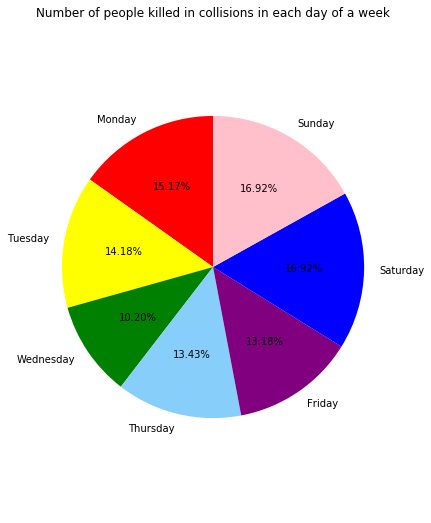

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,9))
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] 
sizes = [61,57,41,54,53,68,68] 
colors = ['red','yellow','green','lightskyblue','purple','blue','pink'] 
patches,text1,text2 = plt.pie(sizes,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%',
                      shadow = False,
                      startangle =90, 
                      pctdistance = 0.6) 
plt.axis('equal')
plt.title("Number of people killed in collisions in each day of a week")
plt.show()

#### Number of people killed in collisions happen on weekend is higher than other days in a week 

### Part 3 Analysis Part B: location.

#### Here is a map by borough for this part.

In [58]:
from IPython.display import Image 
Image(url="https://raw.githubusercontent.com/yzhao84/123/master/borough.png")

In [44]:
import matplotlib.pyplot as plt
import numpy as np

#### 1) Which is the borough where most collisions happen and where most deaths/injuries occur?

In [45]:
%%sql
SELECT borough, COUNT(*) AS collision_count
FROM collision 
JOIN location
  ON collision.location_key = location.location_key
WHERE borough NOT IN ('MISS')
GROUP BY borough
ORDER BY count(*) DESC;

 * postgresql://student@/project4
5 rows affected.


borough,collision_count
BROOKLYN,83800
QUEENS,72038
MANHATTAN,55858
BRONX,39466
STATEN ISLAND,11183


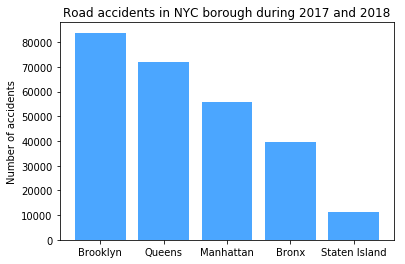

In [46]:
#data
labels = 'Brooklyn','Queens','Manhattan','Bronx','Staten Island'
sizes = [83800,72038,55858,39466,11183]
y_pos = np.arange(len(labels))

#plot
plt.bar(y_pos, sizes, align='center', color = 'dodgerblue',alpha=0.8)
plt.xticks(y_pos, labels)
plt.ylabel('Number of accidents')
plt.title('Road accidents in NYC borough during 2017 and 2018')
 
plt.show()

In [47]:
%%sql
SELECT borough, SUM(Persons_Injured) as count_injured, SUM(Persons_Killed) as count_killed
FROM collision 
JOIN location
  ON collision.location_key = location.location_key
WHERE borough NOT IN ('MISS')
GROUP BY borough
ORDER BY SUM(Persons_Injured) DESC;

 * postgresql://student@/project4
5 rows affected.


borough,count_injured,count_killed
BROOKLYN,22875,68
QUEENS,18841,77
BRONX,10691,32
MANHATTAN,9894,41
STATEN ISLAND,2633,13


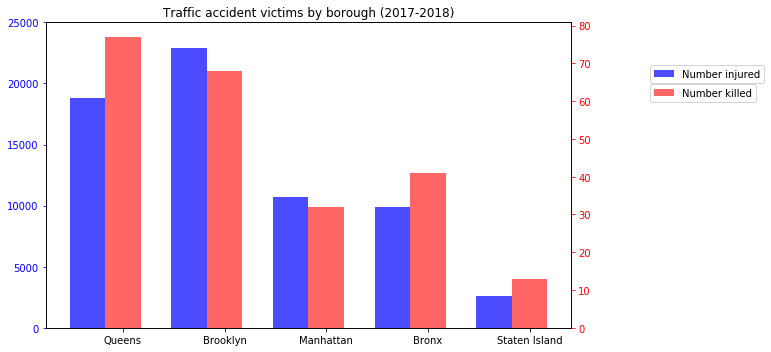

In [48]:
# data
n_groups = 5
count_injured = (18841,22875, 10691, 9894, 2633)
count_killed = (77, 68,32, 41, 13)
fig, ax1 = plt.subplots(figsize=(11,5))
index = np.arange(n_groups)
bar_width = 0.35

#bar chart of number injured
graph1 = ax1.bar(index, count_injured, bar_width, color='b', alpha=0.7, label='Number injured')
ax1.legend(loc=(1.15,0.8))
plt.ylim(0,25000)

#set secondary axis
ax2 = ax1.twinx()
#bar chart of number killed
graph2 = ax2.bar(index + bar_width, count_killed, bar_width, alpha = 0.6, color='r', label='Number killed')

# Make the y-axis labels match the color of the bar graphs
ax1.tick_params('y', colors='b')
ax2.tick_params('y', colors='r')

plt.xlabel('Borough')
plt.title('Traffic accident victims by borough (2017-2018)')
plt.xticks(index + bar_width, ('Queens', 'Brooklyn', 'Manhattan', 'Bronx','Staten Island'))
plt.legend(loc=(1.15,0.74))

fig.tight_layout()
plt.show()


In [49]:
%%sql
SELECT borough, SUM(Persons_Killed) as count_killed, SUM(Persons_Injured) as count_injured
FROM collision 
JOIN location
  ON collision.location_key = location.location_key
WHERE borough NOT IN ('MISS')
GROUP BY borough
ORDER BY SUM(Persons_Killed) DESC;

 * postgresql://student@/project4
5 rows affected.


borough,count_killed,count_injured
QUEENS,77,18841
BROOKLYN,68,22875
MANHATTAN,41,9894
BRONX,32,10691
STATEN ISLAND,13,2633


#### It looks like most collisions happen in Brooklyn and Queens. Most injuries are also in Brooklyn, but the death toll is highest in Queens.

#### 2) Which is the zipcode where most collisions occur and where most deaths/injuries occur?

In [50]:
%%sql
SELECT Zipcode, COUNT(*) AS collision_count
FROM collision 
JOIN location
  ON collision.location_key = location.location_key
WHERE Zipcode NOT IN ('0')
GROUP BY Zipcode
ORDER BY count(*) DESC
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


zipcode,collision_count
11207,4628
11236,3703
11234,3595
11101,3426
11226,3413
11203,3395
11385,3342
11212,3167
11434,3058
10001,3018


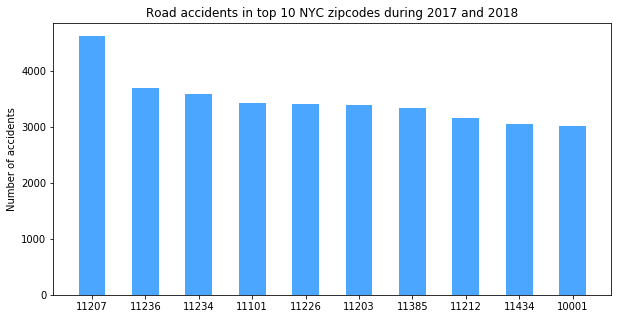

In [51]:
#data
labels = '11207','11236','11234','11101','11226','11203','11385','11212','11434','10001'
sizes = [4628,3703,3595,3426,3413,3395,3342,3167,3058,3018]
y_pos = np.arange(len(labels))

#plot
plt.figure(figsize=(10,5))
plt.bar(y_pos, sizes, align='center', width = 0.5, color = 'dodgerblue',alpha=0.8)
plt.xticks(y_pos, labels)
plt.tick_params(axis='x', which='major', labelsize='medium')
plt.ylabel('Number of accidents')
plt.title('Road accidents in top 10 NYC zipcodes during 2017 and 2018')

plt.show()

In [52]:
%%sql
SELECT Zipcode, SUM(Persons_Injured) as count_injured, SUM(Persons_Killed) as count_killed
FROM collision
JOIN location
  ON collision.location_key = location.location_key
WHERE Zipcode NOT IN ('0')
GROUP BY Zipcode
ORDER BY SUM(Persons_Injured) DESC
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


zipcode,count_injured,count_killed
11207,1442,4
11236,1368,5
11203,1318,0
11212,1150,2
11226,1141,1
11434,1041,2
11234,972,3
11208,919,1
11233,893,5
11385,793,3


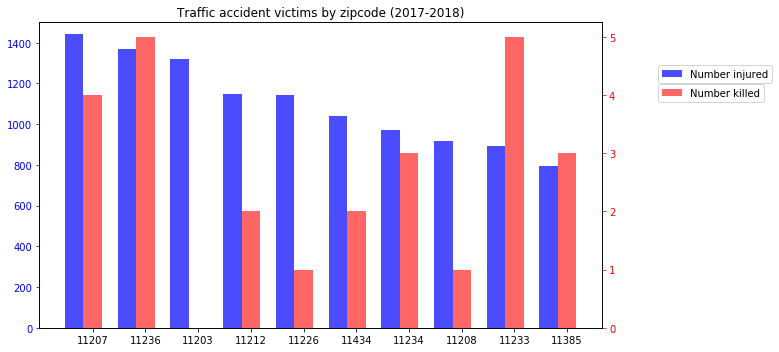

In [53]:
# data
n_groups = 10
count_injured = (1442,1368,1318,1150,1141,1041,972,919,893,793)
count_killed = (4,5,0,2,1,2,3,1,5,3)
fig, ax1 = plt.subplots(figsize=(11,5))
index = np.arange(n_groups)
bar_width = 0.35

#bar chart of number injured
graph1 = ax1.bar(index, count_injured, bar_width, color='b', alpha=0.7, label='Number injured')
ax1.legend(loc =(1.1,0.8))
plt.ylim(0,1500)

#set secondary axis
ax2 = ax1.twinx()
#bar chart of number killed
graph2 = ax2.bar(index + bar_width, count_killed, bar_width, alpha = 0.6, color='r', label='Number killed')

# Make the y-axis labels match the color of the bar graphs
ax1.tick_params('y', colors='b')
ax2.tick_params('y', colors='r')

plt.xlabel('Borough')
plt.title('Traffic accident victims by zipcode (2017-2018)')
plt.xticks(index + bar_width, ('11207','11236','11203','11212','11226','11434','11234','11208','11233','11385'))
plt.legend(loc=(1.1,0.74))

fig.tight_layout()
plt.show()

In [54]:
%%sql
SELECT Zipcode,SUM(Persons_Killed) as count_killed, SUM(Persons_Injured) as count_injured
FROM collision
JOIN location
  ON collision.location_key = location.location_key
WHERE Zipcode NOT IN ('0')
GROUP BY Zipcode
ORDER BY SUM(Persons_Killed) DESC
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


zipcode,count_killed,count_injured
11354,8,468
10014,8,131
11206,6,678
11229,5,497
11233,5,893
11236,5,1368
11207,4,1442
11237,4,382
10301,4,372
11374,4,259


#### It looks like zipcode 11207 is by far the most dangerous when it comes to the number of crashes and the number of injuries. However, 11354 and 10014 have a much higher number of casualties despite counting far fewer injuries.

In [69]:
Image(url="https://raw.githubusercontent.com/yzhao84/123/master/map.png")

#### 3) Which are the streets where most crashes occur?

In [55]:
%%sql
SELECT On_Street_Name,Cross_Street_Name, COUNT(*) count
FROM collision
JOIN location
  ON collision.location_key = location.location_key
WHERE On_Street_Name NOT IN ('MISS')
GROUP BY On_Street_Name, Cross_Street_Name
ORDER BY count(*) DESC
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


on_street_name,cross_street_name,count
BELT PARKWAY,MISS,2731
LONG ISLAND EXPRESSWAY,MISS,2131
BROOKLYN QUEENS EXPRESSWAY,MISS,2108
GRAND CENTRAL PKWY,MISS,1786
FDR DRIVE,MISS,1468
CROSS BRONX EXPY,MISS,1325
BROADWAY,MISS,1224
MAJOR DEEGAN EXPRESSWAY,MISS,1185
VAN WYCK EXPWY,MISS,1162
ATLANTIC AVENUE,MISS,1130


#### The most accidents in New York City tend to occur on major roadways. This makes sense because they probably see the most traffic at higher speeds, and crashes are more likely to happen. Belt parkway is a large road that goes to the JFK International Airport. Long Island Expressway is a highway that cuts through the middle of Long Island down its entire length. Broadway, Manhattan's iconic avenue, is also on this list.

#### 4) Which are the intersections where most crashes occur?

In [56]:
%%sql
SELECT On_Street_Name,Cross_Street_Name, COUNT(*) count
FROM collision
JOIN location
  ON collision.location_key = location.location_key
WHERE On_Street_Name NOT IN ('MISS') AND  Cross_Street_Name NOT IN ('MISS')
GROUP BY On_Street_Name, Cross_Street_Name
ORDER BY count(*) DESC
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


on_street_name,cross_street_name,count
BRUCKNER BOULEVARD,EAST 138 STREET,140
WEST FORDHAM ROAD,MAJOR DEEGAN EXPRESSWAY,117
WEST 41 STREET,10 AVENUE,117
FLATBUSH AVENUE EXTENSION,TILLARY STREET,104
BRUCKNER BOULEVARD,HUNTS POINT AVENUE,102
NORTH CONDUIT AVENUE,COHANCY STREET,98
EAST HOUSTON STREET,BOWERY,95
ROCKAWAY BOULEVARD,BREWER BOULEVARD,92
TILLARY STREET,FLATBUSH AVENUE EXTENSION,91
WEST 40 STREET,11 AVENUE,90


#### These are mostly complex, multiple-lane intersections on the outskirts of Manhattan that see a lot of traffic crossing in and out of the borough via bridges and underpasses.

#### 5) Which are the off street locations where most crashes occur?

In [57]:
%%sql
SELECT Off_Street_Name, Zipcode, borough, COUNT(*) count
FROM collision
JOIN location
  ON collision.location_key = location.location_key
WHERE Off_Street_Name NOT IN ('MISS')
GROUP BY Off_Street_Name, Zipcode, borough
ORDER BY count(*) DESC
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


off_street_name,zipcode,borough,count
772 EDGEWATER ROAD,10474,BRONX,171
110-00 ROCKAWAY BOULEVARD,11420,QUEENS,141
2800 VICTORY BOULEVARD,0,MISS,118
2100 BARTOW AVENUE,10475,BRONX,79
2655 RICHMOND AVENUE,0,MISS,77
501 GATEWAY DRIVE,11239,BROOKLYN,66
450 FLATBUSH AVENUE,11225,BROOKLYN,65
625 ATLANTIC AVENUE,11217,BROOKLYN,63
2795 RICHMOND AVENUE,0,MISS,62
112 RICHMOND HILL ROAD,0,MISS,61


#### 772 Edgewater road in the Bronx is a large market for farm products with small streets. It is often visited by mantrucks and large vans that deliver fresh produce to restaurants in the city. 110-00 Rockaway Boulevard is the parking of a large hotel and entertainment resort. 2800 Victory Boulevard is located on the campus of CUNY at Staten Island, and 2100 Bartow Avenue is the parking of an AMC movie theatre. 

#### Most of these off street locations seem to be parking lots of places that attract many people and cars.

### Part 3 Analysis Part C: numbers of people.

#### 1. In general, how many cases do not involve injuries? How many involve one, two, and more persons injured?

In [59]:
%%sql
SELECT Persons_Injured, COUNT(*) count
FROM collision
GROUP BY Persons_Injured
ORDER BY Persons_Injured

 * postgresql://student@/project4
22 rows affected.


persons_injured,count
0,322390
1,60343
2,11523
3,3703
4,1406
5,581
6,224
7,90
8,42
9,14


<BarContainer object of 22 artists>

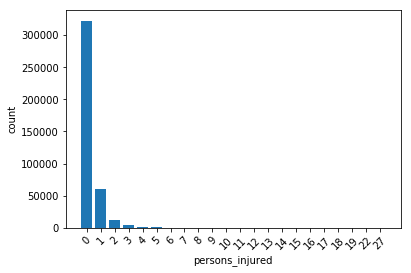

In [60]:
%matplotlib inline
_.bar()

In [61]:
%%sql
Select Persons_Injured, round((Count(Persons_Injured)* 100 / (Select Count(*) From collision)),4) as percentage
From collision
Group By Persons_Injured
ORDER BY Persons_Injured

 * postgresql://student@/project4
22 rows affected.


persons_injured,percentage
0,80.0000
1,15.0000
2,2.0000
3,0.0000
4,0.0000
5,0.0000
6,0.0000
7,0.0000
8,0.0000
9,0.0000


In [62]:
%%sql
Select sum(sub.total) as total_persons_injured
From(
    Select Persons_Injured, Count(Persons_Injured)* Persons_Injured as total
    From collision
    Where Persons_Injured > 0
    Group By Persons_Injured
    ORDER BY Persons_Injured
    ) sub

 * postgresql://student@/project4
1 rows affected.


total_persons_injured
106009


#### Fortunately, in about 80% collisions there's no injuries involved. Approximately 15% of the collisions does have one person injured. Also, there's still 10 rarely happened terrible accidents that involve 15 or more injuries in the recent two years. In total, there's 106009 persons injured.

#### 2. What proportion of accidents do not involve persons killed?

In [63]:
%%sql
Select Persons_Killed, round((Count(Persons_Killed)* 100 / (Select Count(*) From collision)),4) as percentage
From collision
Where Persons_Killed = 0
Group By Persons_Killed
ORDER BY Persons_Killed

 * postgresql://student@/project4
1 rows affected.


persons_killed,percentage
0,99.0000


In [64]:
%%sql
Select sum(sub.total) as total_persons_killed
From(
    Select Persons_Killed, Count(Persons_Killed)* Persons_Killed as total
    From collision
    Where Persons_Killed > 0
    Group By Persons_Killed
    ORDER BY Persons_Killed
    ) sub

 * postgresql://student@/project4
1 rows affected.


total_persons_killed
402


#### It's good to know that no people were killed in about 99% of collisions. However, a total number of 402 people lost their lives in car collisions in New York City over the past two years.

#### Which type of people are most likely to get injured in an accident?

In [65]:
%%sql
SELECT sum(Pedestrian_Injured) as pedestrian, sum(Cyclist_Injured) as cyclist, sum(Motorist_Injured) as motorist
FROM collision

 * postgresql://student@/project4
1 rows affected.


pedestrian,cyclist,motorist
19619,8536,78499


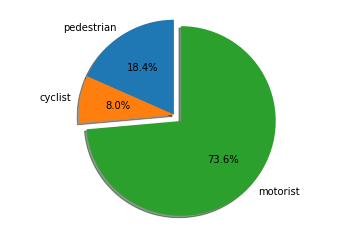

In [66]:
import matplotlib.pyplot as plt

labels = 'pedestrian', 'cyclist', 'motorist'
sizes = [18.4, 8, 73.6]
explode = (0, 0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

#### The majority of injuries occured to motorists, accounting for 73.6%

#### Which type people is most likely to get killed in an accident?

In [67]:
%%sql
SELECT sum(Pedestrian_Killed) as pedestrian, sum(Cyclist_Killed) as cyclist, sum(Motorist_Killed) as motorist
FROM collision

 * postgresql://student@/project4
1 rows affected.


pedestrian,cyclist,motorist
201,32,170


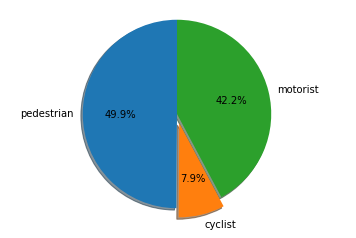

In [68]:
import matplotlib.pyplot as plt

labels = 'pedestrian', 'cyclist', 'motorist'
sizes = [49.9, 7.9, 42.2]
explode = (0, 0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

#### However, pedestrians are the most likely to be killed in an accident instead of motorists. It could be because that pedestrians are more vulnerable compared to motorists sitting in vehicles.

### Part 3 Analysis Part D: factors and vehicles.

#### What's the TOP 15 contributing factor of all collisions.

In [65]:
%%sql
SELECT contributing_factor, COUNT(*) count
FROM collision
JOIN participants
  ON collision.participants_key = participants.participants_key
WHERE contributing_factor not in('Unspecified') 
GROUP BY contributing_factor
ORDER BY count(*) DESC
LIMIT 15;

 * postgresql://student@/project4
15 rows affected.


contributing_factor,count
Driver Inattention/Distraction,94879
Following Too Closely,38981
Failure to Yield Right-of-Way,28181
Backing Unsafely,19613
Passing or Lane Usage Improper,18149
Unsafe Lane Changing,14748
Other Vehicular,10448
Turning Improperly,10067
Traffic Control Disregarded,7233
Driver Inexperience,6755


#### From the analysis, ignoring the unspecified factor, we find that the most frequent factor is Driver Inattention/Distraction, following too closely and Failure to Yield Right-of-Way. This shows that the most collisions are caused by mistakes from drivers, but not natural factors, like pavement slippery, just ranked 15th. This is kind of beyond our expectation.

#### How many people injured or killed in different kind of factors.

In [56]:
%%sql
SELECT sum(persons_injured) as total_injured,sum(persons_killed) as total_killed, contributing_factor
FROM collision
JOIN participants
  ON collision.participants_key = participants.participants_key
WHERE contributing_factor not in('Unspecified') 
GROUP BY contributing_factor
ORDER BY total_injured DESC
LIMIT 15;

 * postgresql://student@/project4
15 rows affected.


total_injured,total_killed,contributing_factor
25883,61,Driver Inattention/Distraction
12251,41,Failure to Yield Right-of-Way
12107,4,Following Too Closely
4675,13,Traffic Control Disregarded
3708,66,Unsafe Speed
2348,10,Other Vehicular
2302,5,Passing or Lane Usage Improper
2165,5,Unsafe Lane Changing
2099,3,Turning Improperly
2016,12,Alcohol Involvement


<BarContainer object of 15 artists>

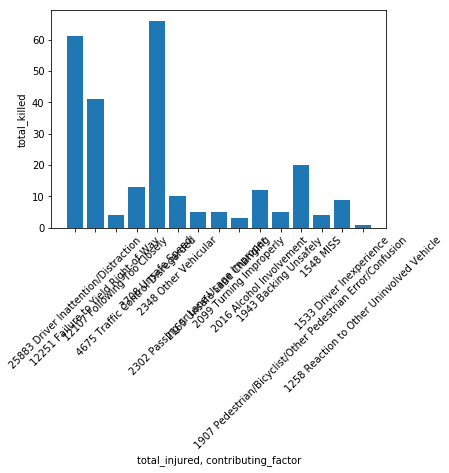

In [57]:
_.bar()

#### FROM the result, we find that most people(more than 10,000) injured due to Driver Inattention/Distraction,Failure to Yield Right-of-Way,Following Too Closely. And most people(more than 30) killed due to Driver Inattention/Distraction, Failure to Yield Right-of-Way, Unsafe Speed. We really should pay attention to safe driving.

#### What's the TOP 10 vehicle type combination of collisions  ?

In [54]:
%%sql
SELECT all_vehicles, COUNT(*) count
FROM collision
JOIN participants
  ON collision.participants_key = participants.participants_key
GROUP BY all_vehicles
ORDER BY count(*) DESC
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


all_vehicles,count
PASSENGER VEHICLE PASSENGER VEHICLE,48844
PASSENGER VEHICLE,39420
PASSENGER VEHICLE SPORT UTILITY / STATION WAGON,29458
SPORT UTILITY / STATION WAGON PASSENGER VEHICLE,29090
SPORT UTILITY / STATION WAGON SPORT UTILITY / STATION WAGON,28618
SPORT UTILITY / STATION WAGON,25080
Sedan Sedan,18130
Station Wagon/Sport Utility Vehicle Station Wagon/Sport Utility Vehicle,12302
Station Wagon/Sport Utility Vehicle Sedan,12093
Sedan Station Wagon/Sport Utility Vehicle,12039


([<matplotlib.patches.Wedge at 0x7f84a5abb898>,
 [Text(0.906885,0.622542,'PASSENGER VEHICLE PASSENGER VEHICLE   '),
  Text(-0.129368,1.09237,'PASSENGER VEHICLE    '),
  Text(-0.90501,0.625265,'PASSENGER VEHICLE SPORT UTILITY / STATION WAGON   '),
  Text(-1.09254,-0.127875,'SPORT UTILITY / STATION WAGON PASSENGER VEHICLE   '),
  Text(-0.744578,-0.809693,'SPORT UTILITY / STATION WAGON SPORT UTILITY / STATION WAGON   '),
  Text(-0.0902773,-1.09629,'SPORT UTILITY / STATION WAGON    '),
  Text(0.478491,-0.990478,'Sedan Sedan   '),
  Text(0.807884,-0.746541,'Station Wagon/Sport Utility Vehicle Station Wagon/Sport Utility Vehicle   '),
  Text(0.992637,-0.473996,'Station Wagon/Sport Utility Vehicle Sedan   '),
  Text(1.08793,-0.162508,'Sedan Station Wagon/Sport Utility Vehicle   ')])

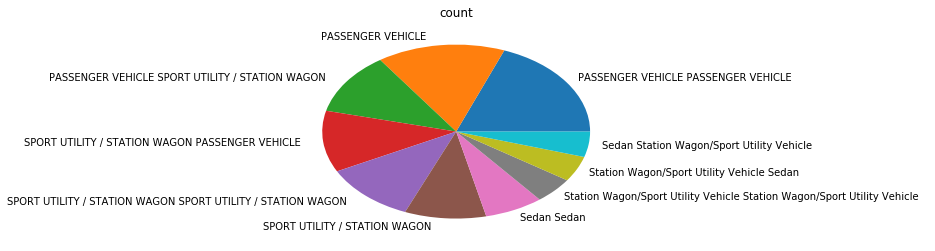

In [55]:
_.pie()

#### From this we find that all top 4 vehicle type combination that includes PASSENGER VEHICLE. This may due to the largest number of passenger vehicles, and the lowest requirement to get a passenger vehicle license.  

#### How many people injured or killed in different kind of vehicle combination.

In [84]:
%%sql
SELECT sum(persons_injured) as total_injured,sum(persons_killed) as total_killed, all_vehicles
FROM collision
JOIN participants
  ON collision.participants_key = participants.participants_key

GROUP BY all_vehicles
ORDER BY count(*) DESC
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


total_injured,total_killed,all_vehicles
11163,5,PASSENGER VEHICLE PASSENGER VEHICLE
9100,53,PASSENGER VEHICLE
6152,10,PASSENGER VEHICLE SPORT UTILITY / STATION WAGON
6238,4,SPORT UTILITY / STATION WAGON PASSENGER VEHICLE
5621,10,SPORT UTILITY / STATION WAGON SPORT UTILITY / STATION WAGON
6381,40,SPORT UTILITY / STATION WAGON
4526,3,Sedan Sedan
2507,3,Station Wagon/Sport Utility Vehicle Station Wagon/Sport Utility Vehicle
2822,1,Station Wagon/Sport Utility Vehicle Sedan
2760,4,Sedan Station Wagon/Sport Utility Vehicle


#### PASSENGER VEHICLE makes most people killed or injured, also SPORT UTILITY / STATION WAGON related collision kills many people. We should pay attention to these vehicle types.

#### TOP vehicle type in vehicle1 (which takes the main responsibility)

In [70]:
%%sql
SELECT Vehicle_Type_Code_1, COUNT(*) count
FROM collision
JOIN participants
  ON collision.participants_key = participants.participants_key
GROUP BY Vehicle_Type_Code_1
ORDER BY count(*) DESC
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


vehicle_type_code_1,count
PASSENGER VEHICLE,143619
SPORT UTILITY / STATION WAGON,100288
Sedan,52856
Station Wagon/Sport Utility Vehicle,40703
TAXI,14085
PICK-UP TRUCK,8511
MISS,6711
Taxi,5468
Pick-up Truck,3637
Box Truck,2466


#### The vehicle types that occurs most collisions are PASSENGER VEHICLE, SPORT UTILITY / STATION WAGON and Sedan.

## Bonus Part

We choose a dataset about weather in new york city between 1/1/2017 to 10/27/2017, 10 months in total about humidity, pressure, temperature, wind and description. We can use this new data to combined our original data, to analyze whether the number of collisions, people injured and people killed are related to the weather condition of NYC.

In [42]:
%%sql
DROP TABLE IF EXISTS weather;

CREATE TABLE weather (

    datetime timestamp,
    humidity INTEGER ,
    pressure INTEGER ,
    temperature numeric ,
    wind INTEGER ,
    description VARCHAR(50)
)

 * postgresql://student@/project4
Done.
Done.


[]

In [43]:
%%sql
COPY weather FROM '/home/ubuntu/Project4/weather.csv'
CSV
HEADER;

 * postgresql://student@/project4
7201 rows affected.


[]

#### Verify that all rows from weather.csv are affected.

In [44]:
%%sql
select * from weather
limit 5

 * postgresql://student@/project4
5 rows affected.


datetime,humidity,pressure,temperature,wind,description
2017-01-01 00:00:00,44,1014,278.76,4,broken clouds
2017-01-01 01:00:00,48,1014,278.69,4,broken clouds
2017-01-01 02:00:00,48,1013,278.92,3,broken clouds
2017-01-01 03:00:00,48,1013,278.65,2,overcast clouds
2017-01-01 04:00:00,45,1013,278.84,1,light snow


In [45]:
%%sql
ALTER TABLE weather
ADD key serial

 * postgresql://student@/project4
Done.


[]

#### Create a temporary table, weathertime, to get the split of datetime column.

In [46]:
%%sql
DROP TABLE IF EXISTS weathertime;

CREATE TABLE weathertime (
    key serial,
    datetime VARCHAR(50),
    year VARCHAR(15),
    month VARCHAR(15),
    day VARCHAR(15),
    hour VARCHAR(15)
);

 * postgresql://student@/project4
Done.
Done.


[]

#### Split datetime into 4 piece

In [47]:
%%sql
INSERT INTO weathertime (datetime,year,month,day,hour)
SELECT DISTINCT 
    TO_CHAR(datetime, 'MM/DD/YYYY HH24:00:00') AS datetime,
    TO_CHAR(datetime, 'YYYY') AS year, 
    TO_CHAR(datetime, 'MM') AS month,
    TO_CHAR(datetime, 'DD') AS day,
    TO_CHAR(datetime, 'HH24') AS hour
From weather
order by datetime

 * postgresql://student@/project4
7201 rows affected.


[]

In [48]:
%%sql
select * from weathertime

limit 10

 * postgresql://student@/project4
10 rows affected.


key,datetime,year,month,day,hour
1,01/01/2017 00:00:00,2017,01,01,00
2,01/01/2017 01:00:00,2017,01,01,01
3,01/01/2017 02:00:00,2017,01,01,02
4,01/01/2017 03:00:00,2017,01,01,03
5,01/01/2017 04:00:00,2017,01,01,04
6,01/01/2017 05:00:00,2017,01,01,05
7,01/01/2017 06:00:00,2017,01,01,06
8,01/01/2017 07:00:00,2017,01,01,07
9,01/01/2017 08:00:00,2017,01,01,08
10,01/01/2017 09:00:00,2017,01,01,09


#### update the weather table, to insert new columns of year, month, day, hour from weathertime table. This will be used to get related with alltime table and collision table.

In [49]:
%%sql
ALTER TABLE weather
ADD year VARCHAR(15),
ADD month VARCHAR(15), 
ADD day VARCHAR(15),
ADD hour VARCHAR(15)

 * postgresql://student@/project4
Done.


[]

In [50]:
%%sql
select * from weather
limit 10

 * postgresql://student@/project4
10 rows affected.


datetime,humidity,pressure,temperature,wind,description,key,year,month,day,hour
2017-01-01 00:00:00,44,1014,278.76,4,broken clouds,1,None,None,None,None
2017-01-01 01:00:00,48,1014,278.69,4,broken clouds,2,None,None,None,None
2017-01-01 02:00:00,48,1013,278.92,3,broken clouds,3,None,None,None,None
2017-01-01 03:00:00,48,1013,278.65,2,overcast clouds,4,None,None,None,None
2017-01-01 04:00:00,45,1013,278.84,1,light snow,5,None,None,None,None
2017-01-01 05:00:00,45,1013,279.07,2,overcast clouds,6,None,None,None,None
2017-01-01 06:00:00,45,1013,279.14,2,overcast clouds,7,None,None,None,None
2017-01-01 07:00:00,45,1012,279.21,3,light snow,8,None,None,None,None
2017-01-01 08:00:00,45,1013,279.43,3,overcast clouds,9,None,None,None,None
2017-01-01 09:00:00,42,1014,279.5,4,scattered clouds,10,None,None,None,None


In [51]:
%%sql
UPDATE weather 
SET year = i.year, 
    month = i.month,
    day=i.day,
    hour=i.hour
FROM (
    SELECT key, year, month,day, hour 
    FROM weathertime) i
WHERE 
    i.key = weather.key

 * postgresql://student@/project4
7201 rows affected.


[]

In [52]:
%%sql
select * from weather
limit 10

 * postgresql://student@/project4
10 rows affected.


datetime,humidity,pressure,temperature,wind,description,key,year,month,day,hour
2017-01-01 00:00:00,44,1014,278.76,4,broken clouds,1,2017,01,01,00
2017-01-01 01:00:00,48,1014,278.69,4,broken clouds,2,2017,01,01,01
2017-01-01 02:00:00,48,1013,278.92,3,broken clouds,3,2017,01,01,02
2017-01-01 03:00:00,48,1013,278.65,2,overcast clouds,4,2017,01,01,03
2017-01-01 04:00:00,45,1013,278.84,1,light snow,5,2017,01,01,04
2017-01-01 05:00:00,45,1013,279.07,2,overcast clouds,6,2017,01,01,05
2017-01-01 06:00:00,45,1013,279.14,2,overcast clouds,7,2017,01,01,06
2017-01-01 07:00:00,45,1012,279.21,3,light snow,8,2017,01,01,07
2017-01-01 08:00:00,45,1013,279.43,3,overcast clouds,9,2017,01,01,08
2017-01-01 09:00:00,42,1014,279.5,4,scattered clouds,10,2017,01,01,09


#### The table and data processing part has finished here. Now we are gonna analyze it with other tables.

#### 1.What's the relationship between humidity and number of collisions?

In [141]:
%%sql
drop table if exists table1a;
create table table1a as
(select  humidity,count(collision.*) as a
    from (collision join alltime on collision.alltime_key=alltime.alltime_key) join weather on alltime.year=weather.year and alltime.month=weather.month and alltime.day=weather.day and alltime.hour=weather.hour
    group by humidity
    order by a desc)

 * postgresql://student@/project4
Done.
88 rows affected.


[]

In [142]:
%%sql
drop table if exists table1b;
create table table1b as
(select humidity, count(humidity) as b from weather
 group by humidity
)

 * postgresql://student@/project4
Done.
88 rows affected.


[]

In [149]:
%%sql
select table1a.humidity, a/b as frequency from table1a join table1b on table1a.humidity=table1b.humidity
order by frequency desc
limit 10

 * postgresql://student@/project4
10 rows affected.


humidity,frequency
13,39
14,38
99,28
15,28
17,28
36,28
72,27
45,27
21,27
82,27


<BarContainer object of 10 artists>

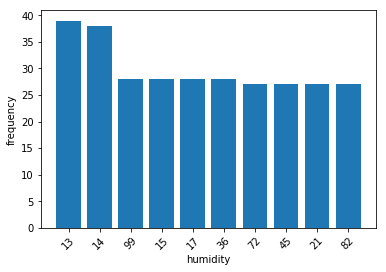

In [150]:
_.bar()

#### From the result, we find that extreme humidity may cause more collisions, and lowest humidity is even more dangerous than extreme high humidity.

#### 2.What's the relationship between pressure and number of collisions?

In [153]:
%%sql
drop table if exists table2a;
create table table2a as
(select  pressure,count(collision.*) as a
    from (collision join alltime on collision.alltime_key=alltime.alltime_key) join weather on alltime.year=weather.year and alltime.month=weather.month and alltime.day=weather.day and alltime.hour=weather.hour
    group by pressure
    order by a desc)

 * postgresql://student@/project4
Done.
56 rows affected.


[]

In [154]:
%%sql
drop table if exists table2b;
create table table2b as
(select pressure, count(pressure) as b from weather
 group by pressure
)

 * postgresql://student@/project4
Done.
56 rows affected.


[]

In [155]:
%%sql
select table2a.pressure, a/b as frequency from table2a join table2b on table2a.pressure=table2b.pressure
order by frequency desc
limit 10

 * postgresql://student@/project4
10 rows affected.


pressure,frequency
1041,38
1043,33
995,33
1042,30
994,30
1001,29
1002,28
993,27
1032,27
996,27


<BarContainer object of 10 artists>

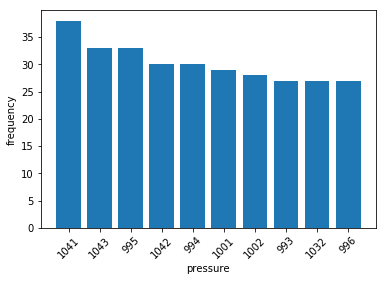

In [156]:
_.bar()

#### From the result, we find that higher pressure (1041,1042,1043) have more probability to have collisions. 

#### 3. Which kind of weather occurs more collision?

In [157]:
%%sql
drop table if exists table3a;
create table table3a as
(select  description,count(collision.*) as a
    from (collision join alltime on collision.alltime_key=alltime.alltime_key) join weather on alltime.year=weather.year and alltime.month=weather.month and alltime.day=weather.day and alltime.hour=weather.hour
    group by description
    order by a desc)
 

 * postgresql://student@/project4
Done.
32 rows affected.


[]

In [158]:
%%sql
drop table if exists table3b;
create table table3b as
(select description, count(description) as b from weather
 group by description
)

 * postgresql://student@/project4
Done.
32 rows affected.


[]

In [159]:
%%sql
select table3a.description, a/b as frequency from table3a join table3b on table3a.description=table3b.description
order by frequency desc
limit 10

 * postgresql://student@/project4
10 rows affected.


description,frequency
proximity thunderstorm with rain,41
proximity thunderstorm with drizzle,36
haze,28
few clouds,26
heavy thunderstorm,26
heavy intensity rain,26
broken clouds,25
proximity thunderstorm,25
heavy intensity drizzle,25
scattered clouds,25


<BarContainer object of 10 artists>

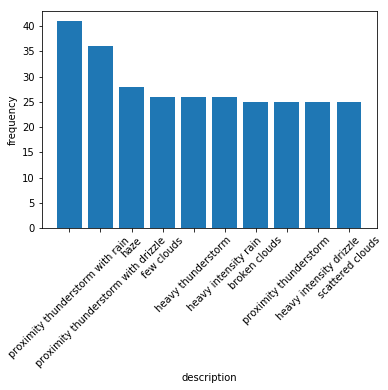

In [160]:
_.bar()

#### Bad weather are more likely to have collisions, such as thunderstorm, haze and intensity rain. 

#### Conclusion: Adding another dataset to our original one is really a useful way to broaden our analysis, and make our insights more comprehensive and valueable. We find that bad weather really make more collisions, so drivers should avoid driving under bad weathers(extreme humidity,high pressure and bad description).